In [1]:
ocp_checkpoint_path = (
    "/network/scratch/a/alexandre.duval/ocp/runs/4648581/checkpoints/best_checkpoint.pt"
)
dataset_path = "/network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset"

In [2]:
from activelearning.dataset.ocp import OCPDatasetHandler

dataset_handler = OCPDatasetHandler(ocp_checkpoint_path, dataset_path, float_precision=32)
dataset_handler.train_data.shape, dataset_handler.test_data.shape

depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze



(torch.Size([40593, 352]), torch.Size([27017, 352]))

In [7]:
import torch
train_dataloader, _ = dataset_handler.get_dataloader()

targets = torch.Tensor([])
for x, y in train_dataloader:
    targets = torch.concat([targets, y])

Text(0.5, 1.0, 'distribution of target values for ocp task and best result retrieved by activelearning loop')

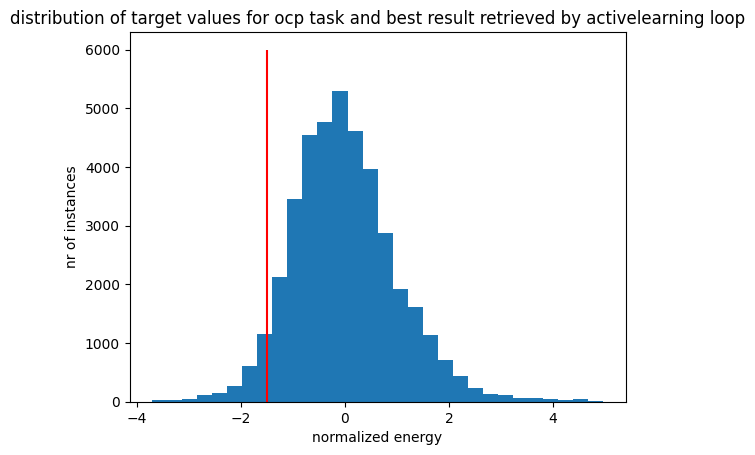

In [24]:
import matplotlib.pyplot as plt
plt.hist(targets, bins=30)
plt.vlines(-1.5, ymin=0, ymax=6000, colors='red')
plt.xlabel("normalized energy")
plt.ylabel("nr of instances")
plt.title("distribution of target values for ocp task and best result retrieved by activelearning loop")

In [2]:
from activelearning.dataset.ocp import OCPDatasetHandler
dataset_handler = OCPDatasetHandler(
    ocp_checkpoint_path, dataset_path, train_fraction=0.1, float_precision=32 # use train_fraction to create a train-test split from the training dataset
)
dataset_handler.train_data.shape, dataset_handler.test_data.shape

depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze



(torch.Size([4059, 352]), torch.Size([36534, 352]))

In [3]:
candidate_set, _, _ = dataset_handler.get_candidate_set(return_index=True)

# Active Learning Loop

In [4]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf

abs_config_dir = os.path.abspath("config/")

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config = compose(config_name="test_ocp.yaml", overrides=[])
    print(OmegaConf.to_yaml(config))
    print(config)

# config.sampler.conf.logger.do.online = False

dataset:
  _target_: activelearning.dataset.ocp.OCPDatasetHandler
  checkpoint_path: /network/scratch/a/alexandre.duval/ocp/runs/4648581/checkpoints/best_checkpoint.pt
  data_path: /network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset
  normalize_labels: true
  target_mean: -1.525913953781128
  target_std: 2.279365062713623
  batch_size: 256
  train_fraction: 0.1
  shuffle: true
oracle:
  _target_: activelearning.oracle.ocp.OCPOracle
  checkpoint_path: ${dataset.checkpoint_path}
  cost: 100
sampler:
  _target_: activelearning.sampler.sampler.GreedySampler
selector:
  _target_: activelearning.selector.selector.Selector
surrogate:
  feature_extractor:
    _target_: activelearning.surrogate.feature_extractor.mlp.MLP
    n_input: 352
    n_hidden:
    - 265
    - 512
    - 265
    n_output: 16
    float_precision: ${float_precision}
  _target_: activelearning.surrogate.gp_surrogate.DeepKernelSVGPSurrogate
  train_epochs: 20
  lr: 0.01
  mll_args:
    num_data: 4059
acquisition:


/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'test_ocp.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [5]:
import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = config.device
# device = "cuda"
n_iterations = config.budget  # TODO: replace with budget
n_samples = config.n_samples

from gflownet.utils.common import set_float_precision

float_prec = set_float_precision(config.float_precision)
# float_prec = set_float_precision(32)


from activelearning.utils.common import set_seeds
# Set other random seeds
# set_seeds(None)#config.seed)
ocp_checkpoint_path = config.dataset.checkpoint_path
dataset_path = config.dataset.data_path

In [6]:
# --- Dataset
dataset_handler = OCPDatasetHandler(
    ocp_checkpoint_path,
    dataset_path,
    train_fraction=0.1,
    float_precision=float_prec,
)


depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze



In [7]:
train_data, test_data = dataset_handler.get_dataloader()

In [9]:
x, y = next(iter(train_data))

In [11]:
x.shape

torch.Size([256, 352])

In [16]:
train_data.dataset.get_raw_item(0) # -> what of this is needed?
# edge_index, pos, cell, atomic_numbers, cell_offsets, batch, tags, neighbors

Data(edge_index=[2, 3117], pos=[76, 3], cell=[1, 3, 3], atomic_numbers=[76], natoms=76, cell_offsets=[3117, 3], force=[76, 3], distances=[3117], fixed=[76], sid=869712, tags=[76], y_init=0.4435526799999252, y_relaxed=-3.092051260000062, pos_relaxed=[76, 3], id='0_10259', fa_pos=[1], fa_cell=[1], fa_rot=[1], load_time=0.0022170220000000004, transform_time=0.001265016, total_get_time=0.0034820380000000002, idx_in_dataset=10259, deup_energy_target=-1.4446282386779785, deup_energy_pred_mean=0.2530812621116638, deup_energy_pred_std=0.0540228895843029, deup_loss=1.697709560394287, deup_s=True, deup_ds='train', deup_idx_in_dataset=10259, deup_q=[98, 352])

depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze

depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.0
⛄️ No layer to freeze

Loading checkpoint from: /network/scratch/a/alexandre.duval/ocp/runs/4648581/checkpoints/best_checkpoint.pt onto cuda:0
--iteration 0 - training on 4059 instances


/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/utils/assorted.py:174: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
Epoch: 100%|██████████| 2/2 [00:19<00:00,  9.80s/it, loss=1.53]


top_score: tensor(-1.6313)
mean_topk_score: tensor(-0.0076)
best_score: tensor(-1.6313)
median_score: tensor(-0.0582)
mean_score: tensor(-0.0076)
worst_score: tensor(2.0850)
scores: tensor([ 0.1002,  0.0877, -0.5412,  0.1341, -0.8474,  0.3240,  1.8136,  0.2481,
         0.9837, -0.8574,  0.2340, -0.0908,  1.7557, -0.3602, -0.1020, -0.5773,
         0.7554, -0.8241, -0.1068, -1.3886,  0.0547, -0.3436, -0.7655, -0.0434,
         0.9693,  1.2347,  1.9166, -0.4472,  1.2546,  0.3858, -1.4409, -0.4957,
         0.9188,  0.1769, -0.4741,  0.2329,  0.4068, -0.4173, -0.4009, -1.2427,
        -0.4462,  0.4546, -0.7023, -0.0651, -0.3211, -1.0914, -0.0040,  0.4325,
        -1.6313,  1.6873,  0.1584,  0.3865, -0.0582, -0.1933, -0.0181, -0.8725,
        -0.2377,  1.0245,  1.1320, -0.9266, -0.2312,  0.0728,  1.7421,  1.2134,
        -0.5538,  0.4374, -0.3326,  0.6141, -0.0172,  0.6896, -0.4165, -1.0363,
         0.3541, -0.4447, -1.3506,  0.3436, -0.4219,  0.4570, -0.9395,  0.0659,
        -1.5676,  

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.0268], device='cuda:0', dtype=torch.float64), std = tensor([0.9127], device='cuda:0', dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)
Epoch:   0%|          | 0/2 [00:02<?, ?it/s, loss=1.7] 


KeyboardInterrupt: 

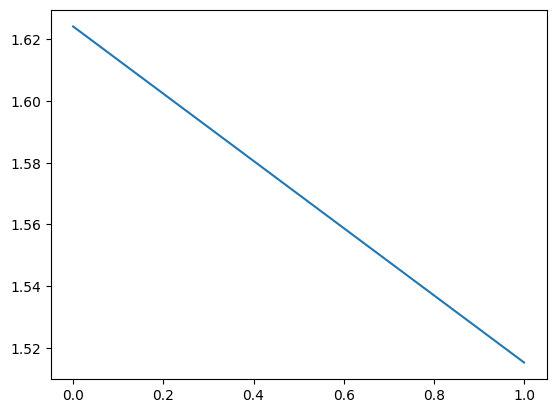

In [3]:
from activelearning.dataset.ocp import OCPDatasetHandler
from activelearning.oracle.ocp import OCPOracle

from activelearning.surrogate.feature_extractor.mlp import MLP
from activelearning.surrogate.gp_surrogate import DeepKernelSVGPSurrogate
from activelearning.acquisition.acquisition import (
    BOTorchMaxValueEntropyAcquisition,
    BOTorchMonteCarloAcquisition,
)
import botorch

from activelearning.sampler.sampler import GreedySampler, RandomSampler
from activelearning.selector.selector import Selector, ScoreSelector


# --- Dataset
dataset_handler = OCPDatasetHandler(
    ocp_checkpoint_path,
    dataset_path,
    train_fraction=0.1,
    float_precision=float_prec,
)

from activelearning.utils.logger import WandBLogger, ConsoleLogger

# logger = WandBLogger(project_name="test_ocp_training", run_name="greedy_epochs-10_samples-100_ei")
logger = ConsoleLogger(
    project_name="test_ocp_training", run_name="greedy_epochs-10_samples-100_ei"
)
# logger = None

from activelearning.utils.plotter import OCPCIME4RExportHelper

# plotter = OCPCIME4RExportHelper(dataset_handler, device=device)
plotter = None

candidate_set, _, _ = dataset_handler.get_candidate_set()


# --- Oracle
oracle = OCPOracle(
    ocp_checkpoint_path,
    device=device,
    float_precision=float_prec,
)
if plotter is not None:
    oracle_dataloader = dataset_handler.prepare_oracle_dataloader(dataset_handler.candidate_data)
    plotter.plot_function(
        oracle,
        oracle_dataloader, 
        label="oraclefn",
        fig="",
        ax="",
    )

best_scores = []
all_scores = {}

for i in range(n_iterations):
    train_data, test_data = dataset_handler.get_dataloader()
    print("--iteration", i, "- training on", len(train_data.dataset), "instances")

    # --- Surrogate (e.g., Bayesian Optimization, DKL)
    # feature_extractor = Identity(dataset_handler.train_data.shape[-1])
    feature_extractor = MLP(
        n_input=dataset_handler.train_data.shape[-1],
        n_hidden=[265, 512, 265],
        n_output=16,
        float_precision=float_prec,
    )
    feature_extractor.to(device)

    # starts with a clean slate each iteration
    surrogate = DeepKernelSVGPSurrogate(
        feature_extractor,
        float_precision=float_prec,
        device=device,
        mll_args={"num_data": len(train_data.dataset)},
        train_epochs=2,
        lr=0.01,
        logger=logger,
    )
    surrogate.fit(train_data)

    if plotter is not None:
        plotter.plot_function(
            surrogate.get_predictions,
            candidate_set,
            output_index=0,
            fig="",
            ax="",
            label="pred_target_mean",
            iteration=i,
        )
        plotter.plot_function(
            surrogate.get_predictions,
            candidate_set,
            output_index=1,
            fig="",
            ax="",
            label="pred_target_var",
            iteration=i,
        )

    # acq_fn = BOTorchMaxValueEntropyAcquisition(
    #     surrogate.model, device=device, float_precision=float_prec
    # )
    acq_fn = BOTorchMonteCarloAcquisition(
        surrogate.model,
        acq_fn_class=botorch.acquisition.monte_carlo.qExpectedImprovement,
        dataset_handler=dataset_handler,
        device=device,
        float_precision=float_prec,
    )
    if plotter is not None:
        plotter.plot_function(
            acq_fn,
            candidate_set,
            fig="",
            ax="",
            label="acq",
            iteration=i,
        )

    # --- Sampler (e.g., GFlowNet, or Random Sampler)
    # also starts with a clean slate; TODO: experiment with NOT training from scratch
    # sampler = RandomSampler(acq_fn, device=device)
    sampler = GreedySampler(
        acq_fn,
        device=device,
        float_precision=float_prec,
    )
    # sampler = hydra.utils.instantiate(
    #     config.sampler,
    #     acquisition=acq_fn,
    #     device=device,
    #     float_precision=float_prec,
    #     _recursive_=False,
    # )

    sampler.fit()  # only necessary for samplers that train a model

    samples, sample_idcs = sampler.get_samples(
        n_samples * 5, candidate_set=candidate_set  # .clone().to(device)
    )

    # --- Selector
    selector = Selector(
        device=device,
        float_precision=float_prec,
    )
    # selector = ScoreSelector(
    #     acq_fn,
    #     device=device,
    #     float_precision=float_prec,
    #     maximize=False
    # )
    selected_samples, selected_idcs = selector(
        n_samples=n_samples, candidate_set=samples, index_set=sample_idcs
    )

    oracle_samples = dataset_handler.prepare_dataset_for_oracle(
        selected_samples, selected_idcs
    )

    scores = oracle(oracle_samples).cpu()
    dataset_handler.update_dataset(oracle_samples.cpu(), scores)
    best_scores.append(scores.min())
    all_scores[i] = scores
    if logger is not None:
        scores_flat = torch.stack(list(all_scores.values())).flatten()
        logger.log_metric(scores_flat.min(), "top_score")
        mean_top_k = (scores_flat
            .topk(n_samples, largest=False)
            .values.mean()
        )
        logger.log_metric(mean_top_k, "mean_topk_score")
        logger.log_metric(scores.min(), "best_score")
        logger.log_metric(torch.median(scores), "median_score")
        logger.log_metric(torch.mean(scores), "mean_score")
        logger.log_metric(scores.max(), "worst_score")
        logger.log_metric(scores, "scores")

        logger.log_step(i)
    
    if plotter is not None:
        plotter.plot_scores(selected_idcs, scores, i+1)

if logger is not None:
    import matplotlib.pyplot as plt

    plt.boxplot(all_scores.values(), labels=all_scores.keys())
    plt.ylim(top=50, bottom=-50)
    logger.log_figure(plt, "all_scores")
    logger.end()

if plotter is not None:
    plotter.end(filename="ocp.csv")
best_scores

In [19]:
raw_candidate_set = oracle_samples.dataset

In [22]:
from torch.utils.data import DataLoader
raw_loader = DataLoader(
    raw_candidate_set,
    collate_fn=dataset_handler.trainer.parallel_collater,
    num_workers=1,  # trainer.config["optim"]["num_workers"], # there ocurs a "AssertionError: can only test a child process" error when using several workers with cuda
    pin_memory=True,
    # batch_sampler=trainer.samplers["deup-train-val_id"],
    batch_size=len(raw_candidate_set),
)

In [25]:

samples = []
for idx in sample_idcs:
    samples.append(dataset_handler.candidate_data.get_raw_item(idx))
    # samples.append(self.trainer.datasets["deup-val_ood_cat-val_ood_ads"][idx])

oracle_loader = DataLoader(
    samples,
    collate_fn=dataset_handler.trainer.parallel_collater,
    num_workers=1,  # trainer.config["optim"]["num_workers"], # there ocurs a "AssertionError: can only test a child process" error when using several workers with cuda
    pin_memory=True,
    # batch_sampler=trainer.samplers["deup-train-val_id"],
    # batch_size=self.batch_size
    batch_size=len(samples),
)

DataBatch(edge_index=[2, 1414453], pos=[40340, 3], cell=[500, 3, 3], atomic_numbers=[40340], natoms=[500], cell_offsets=[1414453, 3], force=[40340, 3], distances=[1414453], fixed=[40340], sid=[500], tags=[40340], y_init=[500], y_relaxed=[500], pos_relaxed=[40340, 3], id=[500], fa_pos=[1], fa_cell=[1], fa_rot=[1], load_time=[500], transform_time=[500], total_get_time=[500], idx_in_dataset=[500], deup_energy_target=[500], deup_energy_pred_mean=[500], deup_energy_pred_std=[500], deup_loss=[500], deup_s=[500], deup_ds=[500], deup_idx_in_dataset=[500], deup_q=[31495, 352], batch=[40340], ptr=[501], neighbors=[500])

In [26]:

scores = oracle(next(iter(oracle_loader))[0])

In [13]:
plotter.end(filename="ocp.csv")

### disseminate 

In [1]:
# Load Hydra config in notebooks
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb
import os
from hydra import initialize_config_dir, compose
import hydra
from omegaconf import OmegaConf

abs_config_dir = os.path.abspath("config/")

with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    config = compose(config_name="test_ocp.yaml", overrides=[])
    print(OmegaConf.to_yaml(config))
    print(config)

# config.sampler.conf.logger.do.online = False
# 
import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = config.device
# device = "cuda"
n_iterations = config.budget  # TODO: replace with budget
n_samples = config.n_samples

from gflownet.utils.common import set_float_precision

float_prec = set_float_precision(config.float_precision)
# float_prec = set_float_precision(32)


from activelearning.utils.common import set_seeds
# Set other random seeds
# set_seeds(None)#config.seed)
ocp_checkpoint_path = config.dataset.checkpoint_path
dataset_path = config.dataset.data_path

/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'test_ocp.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


dataset:
  _target_: activelearning.dataset.ocp.OCPDatasetHandler
  checkpoint_path: /network/scratch/a/alexandre.duval/ocp/runs/4648581/checkpoints/best_checkpoint.pt
  data_path: /network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset
  normalize_labels: true
  target_mean: -1.525913953781128
  target_std: 2.279365062713623
  batch_size: 256
  train_fraction: 0.1
  shuffle: true
oracle:
  _target_: activelearning.oracle.ocp.OCPOracle
  checkpoint_path: ${dataset.checkpoint_path}
  cost: 100
sampler:
  _target_: activelearning.sampler.sampler.GreedySampler
selector:
  _target_: activelearning.selector.selector.Selector
surrogate:
  feature_extractor:
    _target_: activelearning.surrogate.feature_extractor.mlp.MLP
    n_input: 352
    n_hidden:
    - 265
    - 512
    - 265
    n_output: 16
    float_precision: ${float_precision}
  _target_: activelearning.surrogate.gp_surrogate.DeepKernelSVGPSurrogate
  train_epochs: 20
  lr: 0.01
  mll_args:
    num_data: 4059
acquisition:


In [3]:
from activelearning.dataset.ocp import OCPDatasetHandler
from activelearning.oracle.ocp import OCPOracle

from activelearning.surrogate.feature_extractor.mlp import MLP
from activelearning.surrogate.gp_surrogate import DeepKernelSVGPSurrogate
from activelearning.acquisition.acquisition import (
    BOTorchMaxValueEntropyAcquisition,
    BOTorchMonteCarloAcquisition,
)
import botorch

from activelearning.sampler.sampler import GreedySampler, RandomSampler
from activelearning.selector.selector import Selector, ScoreSelector


# --- Dataset
dataset_handler = OCPDatasetHandler(
    ocp_checkpoint_path,
    dataset_path,
    train_fraction=0.1,
    float_precision=float_prec,
)

candidate_set, _, _ = dataset_handler.get_candidate_set()


# --- Oracle
oracle = OCPOracle(
    ocp_checkpoint_path,
    device=device,
    float_precision=float_prec,
)

train_data, test_data = dataset_handler.get_dataloader()
# --- Surrogate (e.g., Bayesian Optimization, DKL)
# feature_extractor = Identity(dataset_handler.train_data.shape[-1])
feature_extractor = MLP(
    n_input=dataset_handler.train_data.shape[-1],
    n_hidden=[265, 512, 265],
    n_output=16,
    float_precision=float_prec,
)
feature_extractor.to(device)

# starts with a clean slate each iteration
surrogate = DeepKernelSVGPSurrogate(
    feature_extractor,
    float_precision=float_prec,
    device=device,
    mll_args={"num_data": len(train_data.dataset)},
    train_epochs=20,
    lr=0.01,
    logger=None,
)
surrogate.fit(train_data)


depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze

depfaenet is2re


Heads up: cat-ads edges being removed!
🗑️ Setting dropout_lin for output block to 0.0
⛄️ No layer to freeze

Loading checkpoint from: /network/scratch/a/alexandre.duval/ocp/runs/4648581/checkpoints/best_checkpoint.pt onto cuda:0


/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/botorch/models/utils/assorted.py:174: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
Epoch: 100%|██████████| 20/20 [02:03<00:00,  6.18s/it, loss=1.44]


In [4]:

# acq_fn = BOTorchMaxValueEntropyAcquisition(
#     surrogate.model, device=device, float_precision=float_prec
# )
acq_fn = BOTorchMonteCarloAcquisition(
    surrogate.model,
    acq_fn_class=botorch.acquisition.monte_carlo.qExpectedImprovement,
    dataset_handler=dataset_handler,
    device=device,
    float_precision=float_prec,
)

In [6]:
values = acq_fn(candidate_set)

In [11]:
values.sort()

torch.return_types.sort(
values=tensor([-5.4189, -5.4173, -5.4165,  ..., -4.3865, -4.3815, -4.3764],
       dtype=torch.float64),
indices=tensor([22360,  4630, 40199,  ..., 14741, 39472,  1103]))

In [16]:
values.sort().indices[:500]

tensor([22360,  4630, 40199, 28418, 22349, 26516,  2216, 11298, 27184,  2192,
        35354, 21053, 22355, 21346, 12982, 40035,  2421, 25919, 30515,  4611,
        13005,  6096, 12929,  9013,  5596,  8148,  4145, 27609,  6717, 29749,
        30710, 21221, 32891, 15957,  3343,  4529, 19487, 36083, 16423, 17813,
        27468,  5639,  1076, 34894, 30907, 21057, 10412,  7973, 27574,  4135,
        23898,  4543, 20477,  7889, 24507, 16759, 26484, 24084, 17037, 20598,
        39432, 35694, 26350, 39234, 16921, 17104, 40399, 17668, 20934, 29185,
        17485,  8427, 10741, 18721, 30701, 21690, 38933,  7269, 27567, 27751,
        32014, 38915,  8350,  4843, 36623,  5029, 33017, 23650, 25090, 35960,
        33455, 11625, 20904,  5806, 26113, 26158,  9362, 15968,  8546, 17002,
         2532, 24444, 29328, 25241, 32418,  9252, 17208, 12843, 13336,  4856,
        33387, 23582,  3021, 23822, 19800, 36717, 31832, 29730, 23381, 12955,
        14343, 35491, 17730,  3651, 37177, 38893, 15195,  3391, 

In [12]:

sampler = GreedySampler(
    acq_fn,
    device=device,
    float_precision=float_prec,
)
sampler.fit()  # only necessary for samplers that train a model

samples, sample_idcs = sampler.get_samples(
    n_samples * 5, candidate_set=candidate_set  # .clone().to(device)
)


In [18]:
from importlib import reload
import activelearning.selector.selector as selector
reload(selector)
from activelearning.selector.selector import Selector

In [21]:

# --- Selector
selector = Selector(
    device=device,
    float_precision=float_prec,
)
selector = ScoreSelector(
    acq_fn,
    device=device,
    float_precision=float_prec,
    maximize=False
)
selected_samples, selected_idcs = selector(
    n_samples=n_samples, candidate_set=samples, index_set=sample_idcs
)


In [22]:
selected_idcs

tensor([22360,  4630, 40199, 28418, 22349, 26516,  2216, 11298, 27184,  2192,
        35354, 21053, 22355, 21346, 12982, 40035,  2421, 25919, 30515,  4611,
        13005,  6096, 12929,  9013,  5596,  8148,  4145, 27609,  6717, 29749,
        30710, 21221, 32891, 15957,  3343,  4529, 19487, 36083, 16423, 17813,
        27468,  5639,  1076, 34894, 30907, 21057, 10412,  7973, 27574,  4135,
        23898,  4543, 20477,  7889, 24507, 16759, 26484, 24084, 17037, 20598,
        39432, 35694, 26350, 39234, 16921, 17104, 40399, 17668, 20934, 29185,
        17485,  8427, 10741, 18721, 30701, 21690, 38933,  7269, 27567, 27751,
        32014, 38915,  8350,  4843, 36623,  5029, 33017, 23650, 25090, 35960,
        33455, 11625, 20904,  5806, 26113, 26158,  9362, 15968,  8546, 17002],
       device='cuda:0')

In [ ]:
best_random = [-19.5108,
 -18.6998,
 -101.4944,
 -19.8136,
 -21.9816,
 -41.6637,
 -43.9884,
 -25.0824,
 -32.8519,
 -38.4684,
 -72.2857,
 -20.4876,
 -47.0560,
 -82.5841,
 -24.8670,
 -55.1170,
 -34.3793,
 -31.7662,
 -50.6191,
 -106.7435]
# ~60min

In [13]:
best_greedy = [-67.8518,
 -71.5149,
 -73.0443,
 -26.6354,
 -76.7294,
 -67.6054,
 -88.1149,
 -51.6454,
 -17.8421,
 -19.2993,
 -21.6410,
 -68.9254,
 -21.4500,
 -63.9918,
 -36.1797,
 -63.5072,
 -29.0900,
 -178.7636,
 -123.6539,
 -29.3034]
# ~90 min

dict_values([[61.23019790649414, -1.1052494049072266, 0.4758191406726837, -0.6500355005264282, -0.1054258793592453, -6.755472183227539, 0.569351315498352, -0.5258908271789551, -0.9443920850753784, -3.095881700515747, 0.1338711529970169, -2.831202983856201, -2.8361618518829346, 0.5388619303703308, -1.8843748569488525, 29.070228576660156, 0.13692229986190796, -1.354300618171692, 0.7534064054489136, 2.411620616912842, -2.215738296508789, 0.17673401534557343, -1.5208951234817505, 0.1667196899652481, -1.5518600940704346, -8.241228103637695, -2.9994139671325684, -0.9064065217971802, -1.820846676826477, 0.35848528146743774, -3.3713979721069336, -2.4635369777679443, -1.9637631177902222, -4.188883304595947, -6.278254508972168, 0.04271547123789787, -8.627618789672852, -2.177323341369629, -1.306711196899414, -7.615851402282715, 0.4171223044395447, -3.326451063156128, -0.7408890128135681, -1.2023711204528809, -4.042849540710449, -6.470515251159668, 1.598052978515625, -1.1564984321594238, -0.332808

(-50.0, 50.0)

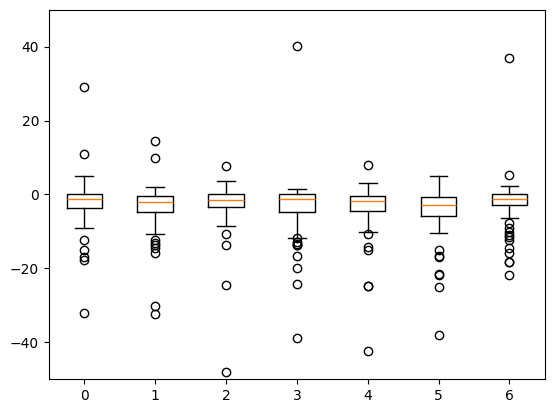

(-50.0, 50.0)

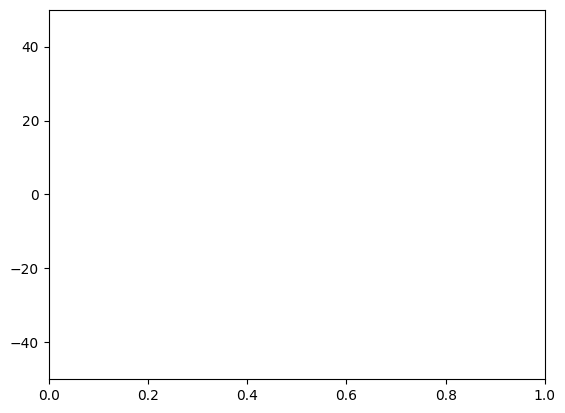

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4f2ce630d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f2ce62ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4f2ce633a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f2ce67d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f2ce67fd0>],
 'means': []}

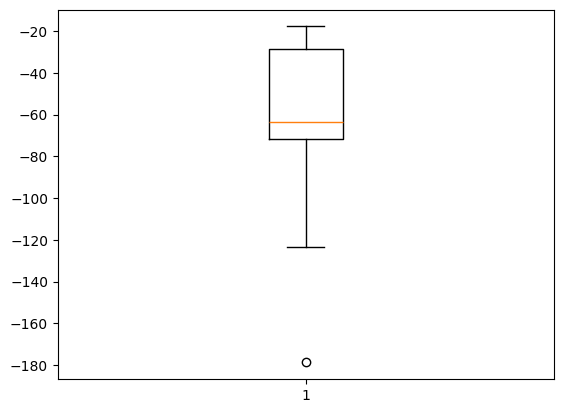

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(best_greedy)

In [19]:
instance = oracle_samples[50]
instance.deup_energy_pred_mean, instance.y_relaxed, instance.deup_energy_target

(tensor([0.0636]), tensor([8.6332]), tensor([-1.7676]))

In [46]:
oracle_samples.y_relaxed.min(), oracle_samples.y_init.min(), oracle_samples.deup_energy_pred_mean.min(), oracle_samples.deup_energy_target.min()

(tensor(-9.5351), tensor(-2.1042), tensor(-0.4340), tensor(-5.2587))

In [47]:
oracle_samples.y_relaxed.max(), oracle_samples.y_init.max(), oracle_samples.deup_energy_pred_mean.max(), oracle_samples.deup_energy_target.max()

(tensor(8.7289), tensor(41.1953), tensor(1.6677), tensor(3.3483))

In [7]:
len(dataset_handler.train_data)

6059

In [8]:
len(dataset_handler.train_data.subset_idcs)

4059

In [ ]:
from activelearning.utils.helper_functions import dataloader_to_data

test_x, test_y = dataloader_to_data(test_data)

In [ ]:
from openTSNE import TSNE

proj_fn = TSNE(2, verbose=True, random_state=31415)
embedding = proj_fn.fit(test_x)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, random_state=31415, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 63.45 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.83 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.73 seconds
===> Running optimization with exaggeration=12.00, lr=2251.42 for 250 iterations...
Iteration   50, KL divergence 5.1831, 50 iterations in 3.1833 sec
Iteration  100, KL divergence 5.1183, 50 iterations in 3.1339 sec
Iteration  150, KL divergence 5.0914, 50 iterations in 3.1131 sec
Iteration  200, KL divergence 5.0795, 50 iterations in 3.1121 sec
Iteration  250, KL divergence 5.0714, 50 iterations in 3.1195 sec
   --> Time elapsed: 15.66 seconds
===> Running optimization with exaggeration=1.00, 

In [28]:
selected_samples_2d = embedding.transform(selected_samples)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...


Iteration   50, KL divergence 27.1400, 50 iterations in 1.4512 sec
Iteration  100, KL divergence 26.9101, 50 iterations in 1.3723 sec
Iteration  150, KL divergence 26.9107, 50 iterations in 1.3852 sec
Iteration  200, KL divergence 26.9111, 50 iterations in 1.3983 sec
Iteration  250, KL divergence 26.9112, 50 iterations in 1.4578 sec
   --> Time elapsed: 7.07 seconds


In [ ]:
res = torch.Tensor([])
for batch_x, batch_y in test_data:
    batch_res = acq_fn(batch_x.to(device)).to("cpu").detach()
    res = torch.concat([res, batch_res], dim=-1)

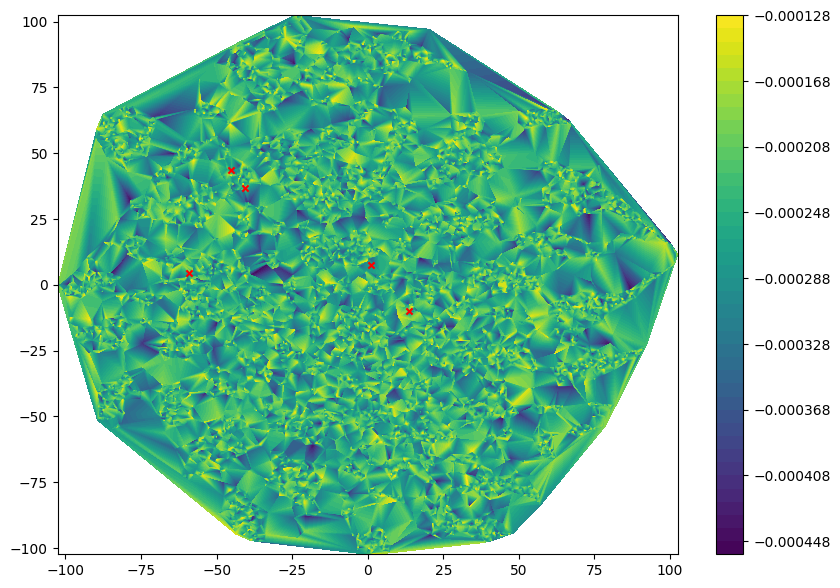

In [33]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 7))
cntr = ax.tricontourf(
    embedding[:, 0],
    embedding[:, 1],
    res,
    levels=50,
)  # , cmap="viridis_r")
ax.scatter(
    selected_samples_2d[:, 1], selected_samples_2d[:, 0], s=20, c="red", marker="x"
)
fig.colorbar(cntr, ax=ax)

### save test data to separate file

In [32]:
dataset = OCPDatasetHandler(trainer)
x, y = dataset.test_data[:]

import numpy as np

with open("ocp_test_x.npy", "wb") as f:
    np.save(f, np.array(x))
with open("ocp_test_y.npy", "wb") as f:
    np.save(f, np.array(y))

In [1]:
import numpy as np

x = np.load("data/ocp/ocp_test_x.npy")
y = np.load("data/ocp/ocp_test_y.npy")

In [2]:
from openTSNE import TSNE

proj_fn = TSNE(2, verbose=True, random_state=31415)
embedding = proj_fn.fit(x)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, random_state=31415, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 33.35 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.10 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.52 seconds
===> Running optimization with exaggeration=12.00, lr=2251.42 for 250 iterations...
Iteration   50, KL divergence 5.1841, 50 iterations in 2.4962 sec
Iteration  100, KL divergence 5.1182, 50 iterations in 2.4529 sec
Iteration  150, KL divergence 5.0908, 50 iterations in 2.4390 sec
Iteration  200, KL divergence 5.0777, 50 iterations in 2.4488 sec
Iteration  250, KL divergence 5.0697, 50 iterations in 2.4367 sec
   --> Time elapsed: 12.27 seconds
===> Running optimization with exaggeration=1.00, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


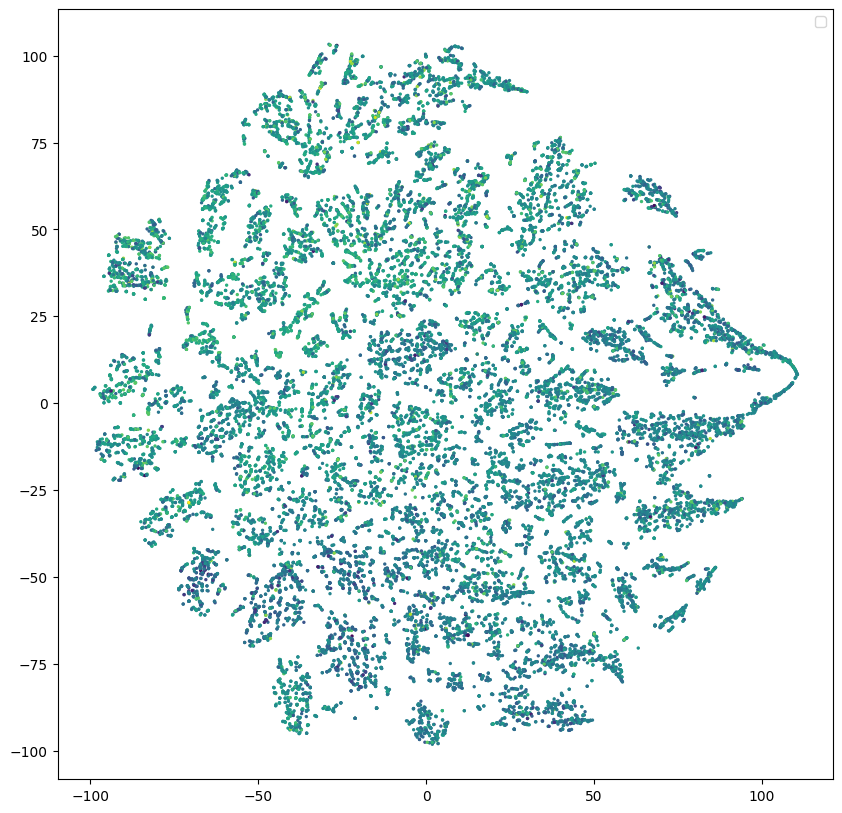

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=2, c=y)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


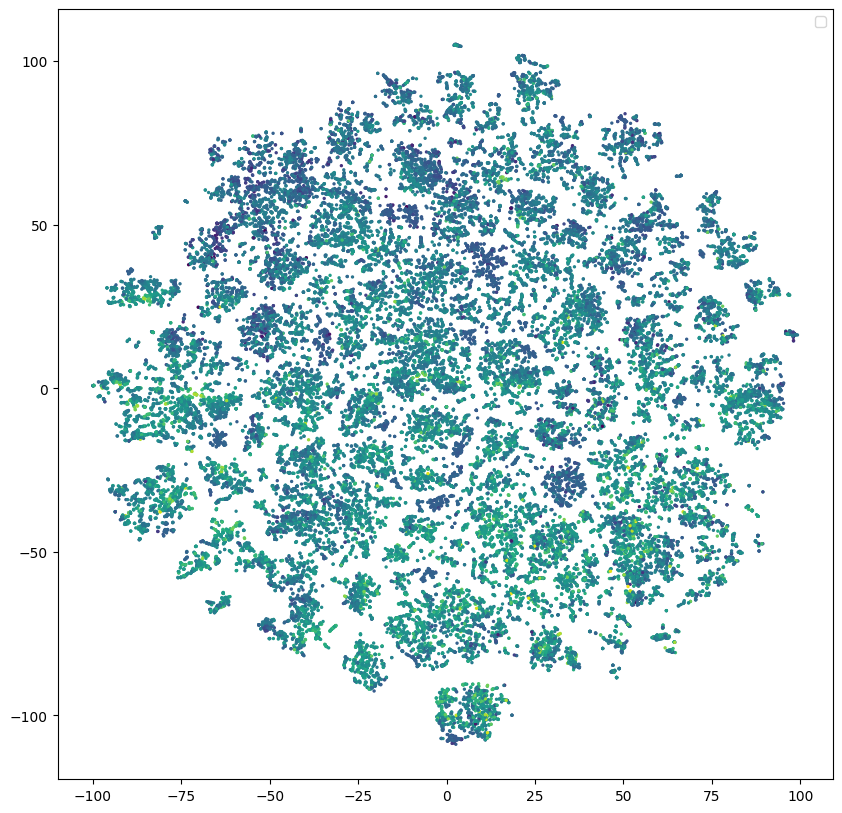

In [90]:
# data/ocp/old
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=2, c=y)
plt.legend()

# Test and Install OCP Repo

In [1]:
import torch

torch.__version__
import torch_sparse

torch_sparse.__version__
import torch_geometric

torch_geometric.__version__

'2.5.2'

In [2]:
# ! pip uninstall ocpmodels -y
# ! pip install git+https://github.com/RolnickLab/ocp.git@uncertainty-depfaenet
# ! pip install torch_geometric
# ! pip install torch-scatter
# ! pip install lmdb
# ! pip install torch-sparse
# ! pip install mendeleev
# ! pip install e3nn
# ! pip install numba
# ! pip install ase
# ! pip install pytorch-warmup
# ! pip install tensorboard
# ! pip install h5py
# ! pip install rdkit
# ! pip install dig

In [3]:
state_dict = torch.load(
    "/network/scratch/a/alexandre.duval/ocp/runs/4616500/checkpoints/checkpoint-0021588.pt",
    map_location=torch.device("cpu"),
)
state_dict.keys()
# from ocpmodels.models.faenet import FAENet
# model = FAENet()
# model.load_state_dict(state_dict["state_dict"]) # not working: Missing and unexpecting keys in state_dict -> use trainer

dict_keys(['epoch', 'step', 'state_dict', 'optimizer', 'scheduler', 'normalizers', 'config', 'val_metrics', 'ema', 'amp', 'warmup_scheduler'])

In [4]:
from ocpmodels.common.utils import make_script_trainer, make_trainer_from_dir
from ocpmodels.trainers import SingleTrainer, BaseTrainer

# configs/models/faenet.yaml
# /home/mila/c/christina.humer/activelearning/config/surrogate/faenet/configs/models/faenet.yaml
from ocpmodels.common import utils
from pathlib import Path

utils.ROOT = Path("/home/mila/c/christina.humer/activelearning/config/surrogate/faenet").resolve()
trainer: SingleTrainer = make_trainer_from_dir(
    "/network/scratch/a/alexandre.duval/ocp/runs/4616500",
    mode="restart",
    skip_imports=["qm7x", "gemnet", "spherenet", "painn", "comenet"],
    overrides={
        "is_debug": True,
        "silent": True,
        "cp_data_to_tmpdir": False,
        # "logger":
        # "config": "faenet-deup_is2re-"
    },
)

🅾️  Removing orion config from continue config. Set to None: {}
✅ Loading config from /network/scratch/a/alexandre.duval/ocp/runs/4616500/checkpoints/checkpoint-0021588.pt (and restarting from scratch)
faenet is2re
🏭 Overriding num_workers from 4 to 2 to match the machine's CPUs. Use --no_cpus_to_workers=true to disable this behavior.
📊 Automatically setting target stats to {'mean': 0.5282385349273682, 'std': 0.4441642761230469} for deup dataset /network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset
🗑️ Setting dropout_lin for output block to 0.0
⛄️ No layer to freeze



In [8]:
####### load deup dataset
from ocpmodels.common import utils
def deup_data_from_dir(path, mode, overrides={}, silent=None, skip_imports=[]):
    path = utils.resolve(path)
    assert path.exists()
    trainer = utils.make_trainer_from_dir(path, mode, overrides, silent, skip_imports)
    return trainer.loaders, trainer.datasets


data_config = {
    "default_val": "deup-val_ood_cat-val_ood_ads",
    "deup-train-val_id": {
        "src": "/network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset"
    },
    "deup-val_ood_cat-val_ood_ads": {
        "src": "/network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset"
    },
}

deup_loaders, deup_datasets = deup_data_from_dir(
    "/network/scratch/a/alexandre.duval/ocp/runs/4648581",
    mode="continue",
    overrides={
        "is_debug": True,
        # "silent": True,
        # "cp_data_to_tmpdir": False,
        # "config": "faenet-deup_is2re-all",
        # "deup_dataset.create": False,
        "dataset": data_config,
    },
    skip_imports=["qm7x", "gemnet", "spherenet", "painn", "comenet"],
    silent=True,
)
###########

depfaenet is2re


Heads up: cat-ads edges being removed!
Filtered dataset all-train from 460328 to 38440 samples. (adsorbates: {'*O', '*OH', '*OH2', '*H'})


Setting max_epochs to 13 from max_steps (1802), dataset length (38440), and batch_size (256)

Filtered dataset all-val_id from 24943 to 2153 samples. (adsorbates: {'*O', '*OH', '*OH2', '*H'})
Filtered dataset all-val_ood_cat from 24963 to 2056 samples. (adsorbates: {'*O', '*OH', '*OH2', '*H'})


Setting max_epochs to 12 from max_steps (1802), dataset length (40593), and batch_size (256)

🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze

Using max_steps for scheduler -> 1802


In [9]:
deup_loaders, deup_datasets

({'train': <torch.utils.data.dataloader.DataLoader at 0x7f87110c7490>,
  'val_id': <torch.utils.data.dataloader.DataLoader at 0x7f5378a99840>,
  'val_ood_cat': <torch.utils.data.dataloader.DataLoader at 0x7f53786a9f00>,
  'val_ood_ads': <torch.utils.data.dataloader.DataLoader at 0x7f53786c0220>,
  'val_ood_both': <torch.utils.data.dataloader.DataLoader at 0x7f5378400370>,
  'deup-train-val_id': <torch.utils.data.dataloader.DataLoader at 0x7f5378400490>,
  'deup-val_ood_cat-val_ood_ads': <torch.utils.data.dataloader.DataLoader at 0x7f53723dd3c0>},
 {'train': <ocpmodels.datasets.lmdb_dataset.LmdbDataset at 0x7f87087dc970>,
  'val_id': <ocpmodels.datasets.lmdb_dataset.LmdbDataset at 0x7f860ccf9510>,
  'val_ood_cat': <ocpmodels.datasets.lmdb_dataset.LmdbDataset at 0x7f5378a9a500>,
  'val_ood_ads': <ocpmodels.datasets.lmdb_dataset.LmdbDataset at 0x7f53786ab520>,
  'val_ood_both': <ocpmodels.datasets.lmdb_dataset.LmdbDataset at 0x7f53786c02e0>,
  'deup-train-val_id': <ocpmodels.datasets.lmdb

In [12]:
len(deup_loaders["deup-train-val_id"].dataset), len(deup_datasets["deup-train-val_id"])

(40593, 40593)

In [13]:
deup_batch = next(iter(deup_loaders["deup-train-val_id"]))

In [9]:
deup_batch[0].deup_q

tensor([[ 0.9816,  0.1751,  0.3517,  ..., -0.0429,  0.6899,  0.1189],
        [ 0.9376,  0.7443,  0.7541,  ...,  0.9189,  0.9239, -0.2435],
        [ 1.7830, -0.4226,  0.5801,  ...,  0.2578,  0.3518, -0.3395],
        ...,
        [ 0.0562,  0.2750,  0.0595,  ..., -0.2831, -0.4932, -0.0993],
        [ 0.0968,  0.6408,  0.9602,  ...,  0.2830,  0.0513,  0.1802],
        [-0.3790, -0.9873,  2.0678,  ...,  0.1726, -0.4508, -0.5368]])

In [4]:
utils.ROOT

PosixPath('/home/mila/c/christina.humer/ocp')

In [3]:
deup_loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f858dc61780>,
 'val_id': <torch.utils.data.dataloader.DataLoader at 0x7f858d992da0>,
 'val_ood_cat': <torch.utils.data.dataloader.DataLoader at 0x7f858cee8850>,
 'val_ood_ads': <torch.utils.data.dataloader.DataLoader at 0x7f858ce12260>,
 'val_ood_both': <torch.utils.data.dataloader.DataLoader at 0x7f858cd3c190>,
 'deup-train-val_id': <torch.utils.data.dataloader.DataLoader at 0x7f858cd3c2b0>,
 'deup-val_ood_cat-val_ood_ads': <torch.utils.data.dataloader.DataLoader at 0x7f5fce869f30>}

In [20]:
from ocpmodels.common.utils import make_trainer_from_dir
from ocpmodels.common.gfn import FAENetWrapper
from ocpmodels.datasets.data_transforms import get_transforms
from ocpmodels.common import utils
from pathlib import Path
import os

abs_config_dir = os.path.abspath("config/")

# have to set the ROOT to a folder that contains "configs/models/faenet.yaml" and "configs/models/tasks/is2re.yaml"
# utils.ROOT = Path(abs_config_dir + "surrogate/faenet").resolve()
utils.ROOT = Path("/home/mila/c/christina.humer/activelearning/config/surrogate/faenet").resolve()

data_config = {
    "default_val": "deup-val_ood_cat-val_ood_ads",
    "deup-train-val_id": {
        "src": "/network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset"
    },
    "deup-val_ood_cat-val_ood_ads": {
        "src": "/network/scratch/a/alexandre.duval/ocp/runs/4657270/deup_dataset"
    },
    "train": {
        "src": "/network/scratch/s/schmidtv/ocp/datasets/ocp/is2re/all/train/",
        "normalize_labels": True,
    },
    "val_id": {"src": "/network/scratch/s/schmidtv/ocp/datasets/ocp/is2re/all/val_id/"},
    "val_ood_cat": {
        "src": "/network/scratch/s/schmidtv/ocp/datasets/ocp/is2re/all/val_ood_cat/"
    },
    "val_ood_ads": {
        "src": "/network/scratch/s/schmidtv/ocp/datasets/ocp/is2re/all/val_ood_ads/"
    },
    "val_ood_both": {
        "src": "/network/scratch/s/schmidtv/ocp/datasets/ocp/is2re/all/val_ood_both/"
    },
}

########## load faenet --> oracle
trainer = make_trainer_from_dir(
    "/network/scratch/a/alexandre.duval/ocp/runs/4647489",
    mode="continue",
    overrides={
        "is_debug": True,
        # "silent": True,
        # "cp_data_to_tmpdir": False,
        # "config": "faenet-deup_is2re-all",
        # "deup_dataset.create": False,
        # "dataset": data_config,
    },
    skip_imports=["qm7x", "gemnet", "spherenet", "painn", "comenet"],
    silent=True,
)
trainer.load_checkpoint("/network/scratch/a/alexandre.duval/ocp/runs/4647489/checkpoints/best_checkpoint.pt")

wrapper = FAENetWrapper(
    faenet=trainer.model,
    transform=get_transforms(trainer.config),
    frame_averaging=trainer.config.get("frame_averaging", ""),
    trainer_config=trainer.config,
)

wrapper.freeze()
###########


loaders = trainer.loaders

data_gen = iter(loaders["train"])
batch = next(data_gen)
preds = wrapper(batch, retrieve_hidden=True)

# batch[0].deup_q  # [6481, 384] => scatter,   out = scatter(h, batch, dim=0, reduce="add")
# new one: [N_graphs=256, embedding_size=384] => input to the GP
# batch.y_relaxed => ground truth energy of the system
# deup_energy_target

# TODO: extract the hidden representation of FAENet
# /network/scratch/a/alexandre.duval/ocp/runs/4642835/deup_dataset

faenet is2re


Setting max_epochs to 15 from max_steps (25175), dataset length (460328), and batch_size (256)

🗑️ Setting dropout_lin for output block to 0.3
⛄️ No layer to freeze

Using max_steps for scheduler -> 25175
Loading checkpoint from: /network/scratch/a/alexandre.duval/ocp/runs/4647489/checkpoints/best_checkpoint.pt onto cuda:0


In [21]:
preds

{'energy': tensor([-2.5390e-01,  1.0563e+00, -1.1312e+00,  1.9313e-01, -6.6216e-01,
          3.0283e+00, -9.5928e-01,  2.0100e+00, -7.1113e-01, -3.9374e-01,
          1.6391e+00, -5.4240e-01, -8.4445e-01,  2.3472e-01, -2.3146e-01,
         -5.6931e-01, -2.1257e+00,  6.1915e-01, -7.4519e-01, -9.2869e-01,
         -3.7800e-01,  1.0825e+00,  8.6457e-02, -6.9170e-01, -3.9171e-01,
         -1.7151e-01, -1.1900e+00, -8.6620e-01, -2.9177e-01, -1.0758e+00,
          1.5352e+00, -1.9321e-01, -5.0804e-01, -3.7608e-01,  1.2812e-01,
         -1.0439e+00,  3.6823e-01,  1.4486e+00,  3.9617e-01, -3.4194e-01,
          2.1095e-01, -9.4936e-02,  3.3776e-01, -6.9676e-02,  3.4067e+00,
          2.2594e+00, -9.4482e-01, -1.3787e+00, -1.1570e+00,  5.6359e-01,
         -1.5272e-01, -3.5117e-01, -1.1168e+00,  3.0768e-02, -1.1590e+00,
          1.2908e-01, -1.1555e+00, -3.6178e-01, -1.0537e+00,  1.2875e+00,
         -1.6272e+00, -4.4725e-01, -9.3632e-01, -3.9864e-01, -5.8013e-02,
          3.5520e-01,  1.667

In [22]:
preds["energy"].min(), preds["energy"].max(), preds["energy"].mean(), preds["energy"].std()

(tensor(-2.1257, device='cuda:0'),
 tensor(3.9077, device='cuda:0'),
 tensor(0.1448, device='cuda:0'),
 tensor(1.0034, device='cuda:0'))

In [23]:

from ocpmodels.modules.normalizer import Normalizer
target_normalizer = Normalizer(
    # mean=0.5282385349273682,
    # std=0.4441642761230469,
    mean=-1.525913953781128,
    std=2.279365062713623,
    device="cpu",
)

In [27]:
trainer.normalizers["target"].denorm(preds["energy"])

tensor([-2.1046,  0.8818, -4.1043, -1.0857, -3.0352,  5.3766, -3.7125,  3.0556,
        -3.1468, -2.4234,  2.2103, -2.7622, -3.4507, -0.9909, -2.0535, -2.8236,
        -6.3712, -0.1147, -3.2245, -3.6427, -2.3875,  0.9416, -1.3288, -3.1025,
        -2.4188, -1.9169, -4.2383, -3.5003, -2.1910, -3.9780,  1.9733, -1.9663,
        -2.6839, -2.3831, -1.2339, -3.9053, -0.6866,  1.7760, -0.6229, -2.3053,
        -1.0451, -1.7423, -0.7560, -1.6847,  6.2393,  3.6242, -3.6795, -4.6684,
        -4.1631, -0.2413, -1.8740, -2.3264, -4.0715, -1.4558, -4.1678, -1.2317,
        -4.1597, -2.3505, -3.9277,  1.4087, -5.2350, -2.5454, -3.6601, -2.4346,
        -1.6581, -0.7163,  2.2744, -1.0915,  0.3989, -2.5101, -3.0921, -2.3250,
        -2.7769, -1.5595, -0.0963, -1.1011,  0.1203, -1.7786,  0.0265,  2.0698,
        -0.4178,  6.6681, -1.4955, -1.2806, -2.1106,  1.1590, -3.3595,  2.9929,
        -1.5218, -3.3102,  0.1207,  2.1432, -1.1140, -3.3837, -1.6125,  2.2726,
        -1.8835, -4.1406, -0.9778,  6.85

In [24]:
denormed_preds = target_normalizer.denorm(preds["energy"])
denormed_preds.min(), denormed_preds.max(), denormed_preds.mean(), denormed_preds.std()

(tensor(-6.3712, device='cuda:0'),
 tensor(7.3812, device='cuda:0'),
 tensor(-1.1958, device='cuda:0'),
 tensor(2.2872, device='cuda:0'))

In [14]:
batch[0].idx_in_dataset

tensor([256684, 179603, 419863, 113738, 447115, 423092, 438707,  81005, 398865,
         49750, 217843, 210115, 412856,  66972, 323412,  74814, 234880,  18701,
        339942, 419148, 137950,  31694, 436609, 240487, 121648, 447674, 239223,
        122895, 378977,  84257, 455535,    787, 301747,  11773,  50943,  73337,
        437938, 281117,  39529, 370225, 244090, 122831,   7236, 175727,  55911,
        299554, 113523, 345588, 295990, 177724, 119952, 451910, 308713, 181644,
          6855, 417041, 257191, 122015, 174904, 169675, 316335, 347341, 346841,
        257397, 267255, 345505, 175636, 368578, 156136, 351865, 257493, 329944,
        409166, 294283,  29144, 285278, 388083, 397071, 285459, 395267, 402970,
         14513, 154838, 294816, 114813, 220930,  10491, 117270, 128027,  58462,
        198421, 433396, 143046, 146581,  72827, 240346, 291766, 182700, 105355,
        192754, 103417, 274781,  74240, 114643, 387436, 120228, 147870,  46846,
        150175, 299423, 191095, 283699, 

In [13]:
batch[0].y_relaxed.min(), batch[0].y_relaxed.max(), batch[0].y_relaxed.std(), batch[0].y_relaxed.mean()

(tensor(-8.4487), tensor(7.2186), tensor(2.4061), tensor(-1.2729))

In [22]:
trainer.normalizer

{'src': '/network/scratch/a/alexandre.duval/ocp/runs/4642835/deup_dataset',
 'target_mean': 0.5282385349273682,
 'target_std': 0.4441642761230469,
 'split': 'all'}

In [35]:
batch[0]

DataBatch(edge_index=[2, 123624], pos=[6481, 3], cell=[256, 3, 3], atomic_numbers=[6481], natoms=[256], cell_offsets=[123624, 3], force=[6481, 3], distances=[123624], fixed=[6481], sid=[256], tags=[6481], y_init=[256], y_relaxed=[256], pos_relaxed=[6481, 3], id=[256], batch=[6481], neighbors=[256], fa_pos=[1], fa_cell=[1], fa_rot=[1], load_time=[256], transform_time=[256], total_get_time=[256], idx_in_dataset=[256], deup_energy_target=[256], deup_energy_pred_mean=[256], deup_energy_pred_std=[256], deup_loss=[256], deup_s=[256], deup_ds=[256], deup_idx_in_dataset=[256], deup_q=[6481, 384], ptr=[257])

In [40]:
batch[0].y_relaxed.min(), batch[0].y_init.min(), batch[0].deup_energy_target.min(), batch[0].deup_energy_pred_mean.min()

(tensor(-7.6529), tensor(-3.7560), tensor(-7.6529), tensor(-2.2590))

In [41]:
batch[0].y_relaxed.max(), batch[0].y_init.max(), batch[0].deup_energy_target.max(), batch[0].deup_energy_pred_mean.max()

(tensor(6.3668), tensor(29.4608), tensor(6.3668), tensor(3.0669))

In [69]:
loaders["deup-train-val_id"].dataset

In [39]:
batch = next(iter(loaders["deup-train-val_id"]))[0]
hidden_states = batch.deup_q
state_idcs = batch.batch
from torch_scatter import scatter

out = scatter(hidden_states, state_idcs, dim=0, reduce="add")
out.shape

torch.Size([256, 384])

In [59]:
y_train.shape, hidden_states.shape

(torch.Size([5120]), torch.Size([5120, 384]))

In [57]:
import torch
from torch_scatter import scatter

hidden_states = torch.Tensor([])
y_train = torch.Tensor([])
for batch in loaders["deup-train-val_id"]:
    h = batch[0].deup_q
    state_idcs = batch[0].batch
    pooled_states = scatter(h, state_idcs, dim=0, reduce="add")
    hidden_states = torch.concat([hidden_states, pooled_states])
    y_train = torch.concat([y_train, batch[0].y_relaxed])

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9454729f30>
Traceback (most recent call last):
  File "/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9454729f30>
Traceback (most recent call last):
  File "/home/mila/c/christina.humer/.conda/envs/al_new/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers

KeyboardInterrupt: 

In [ ]:
# deup_energy_target=[256]  # target residual (uncertainty) ??
# deup_energy_pred_mean=[256]  # mean energy pred by depfaenet
# deup_energy_pred_std=[256]   # std of depfaenet pred
# deup_loss=[256]  # loss value
# deup_s=[256]  # s=0 for train and s=1 for val
# deup_ds=[256]  # 'train', 'val_id', etc.
# deup_idx_in_dataset=[256]  # index
# deup_q=[6481, 384]  # intermediate graph rep. of depfaenet (frozen)

In [60]:
from activelearning.utils.plotter import ProjectionPlotHelper

plotter = ProjectionPlotHelper(hidden_states)

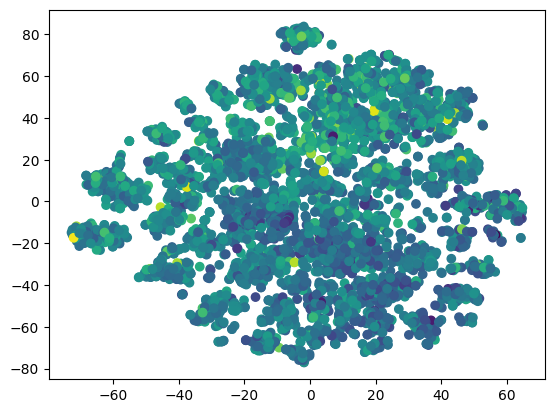

In [61]:
import matplotlib.pyplot as plt

plt.scatter(plotter.embedding[:, 0], plotter.embedding[:, 1], c=y_train)

In [64]:
loaders["deup-train-val_id"].dataset

In [24]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f827c6b3400>,
 'val_id': <torch.utils.data.dataloader.DataLoader at 0x7f827c5dc9a0>,
 'val_ood_cat': <torch.utils.data.dataloader.DataLoader at 0x7f827c506410>,
 'val_ood_ads': <torch.utils.data.dataloader.DataLoader at 0x7f827c42fe20>,
 'val_ood_both': <torch.utils.data.dataloader.DataLoader at 0x7f827c359d50>,
 'deup-train-val_id': <torch.utils.data.dataloader.DataLoader at 0x7f827c359e70>,
 'deup-val_ood_cat-val_ood_ads': <torch.utils.data.dataloader.DataLoader at 0x7f3554b5faf0>}

In [20]:
preds = wrapper(batch, retrieve_hidden=True)

In [ ]:
next(iter(loaders["val_ood_cat"]))[0]

In [11]:
batch

[DataBatch(edge_index=[2, 120226], pos=[6519, 3], cell=[256, 3, 3], atomic_numbers=[6519], natoms=[256], cell_offsets=[120226, 3], force=[6519, 3], distances=[120226], fixed=[6519], sid=[256], tags=[6519], y_init=[256], y_relaxed=[256], pos_relaxed=[6519, 3], id=[256], batch=[6519], neighbors=[256], fa_pos=[1], fa_cell=[1], fa_rot=[1], load_time=[256], transform_time=[256], total_get_time=[256], idx_in_dataset=[256], ptr=[257])]

In [ ]:
preds["energy"].shape, preds["hidden_state"].shape

In [22]:
preds

{'energy': tensor([ 1.1442e+00,  3.6220e+00, -1.2244e+02, -2.2373e+01,  7.5854e-01,
          1.4625e+02,  2.1399e+00,  1.8880e+00,  3.2786e+00,  1.2651e+00,
          1.2998e+00,  4.0349e+01,  9.7554e-01, -1.1666e+00, -2.6847e+01,
         -2.4806e+00, -9.8585e+00, -1.7623e-01,  2.4336e+01,  2.9938e+00,
         -3.4471e+00,  5.5053e+00, -1.9965e+00, -1.2987e+00,  6.1720e+00,
          4.2054e-01, -1.1033e+00, -2.5873e+00,  1.2704e+00, -1.2722e+01,
         -7.6041e+00,  3.6775e+00,  6.4320e+00, -9.3494e-01,  2.4448e+00,
          3.5736e+00, -2.5009e+00, -2.2707e+01,  6.3083e+01,  2.1096e+00,
         -2.6351e+00, -8.0351e+00,  3.3947e+00, -1.5669e+00, -1.7613e+00,
          9.4439e+01, -1.4965e+01, -3.7918e+00,  4.5602e-01,  2.2037e+00,
          6.3680e+00, -2.2756e+00, -1.7069e+01, -1.1921e+01, -4.4359e+01,
          7.2672e-01, -1.0005e+01,  5.6682e-01,  1.2769e+00, -3.9946e+00,
         -1.2548e+00, -5.5476e+00, -5.9397e+00, -2.6136e+02, -4.4211e+00,
          7.6146e+00,  1.629

In [7]:
preds["energy"].shape, preds["hidden_state"].shape

(torch.Size([256]), torch.Size([6519, 384]))

In [7]:
from ocpmodels.trainers import SingleTrainer, BaseTrainer

SingleTrainer(**state_dict["config"])

fatal: not a git repository (or any parent up to mount point /home)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).



🧰 Trainer config:
------------------

adsorbates: all
adsorbates_ref_dir: /network/scratch/s/schmidtv/ocp/datasets/ocp/per_ads
amp: false
checkpoint_dir: /network/scratch/a/alexandre.duval/ocp/runs/4616500/checkpoints
cluster_name: mila
commit: 040b475d
config: faenet-is2re-all
cp_data_to_tmpdir: true
cpu: false
data_split: all
dataset:
  default_val: val_id
  train:
    normalize_labels: true
    split: all
    src: /tmp/train
    target_mean: -1.525913953781128
    target_std: 2.279365062713623
  val_id:
    split: all
    src: /tmp/val_id
  val_ood_ads:
    split: all
    src: /tmp/val_ood_ads
  val_ood_both:
    split: all
    src: /tmp/val_ood_both
  val_ood_cat:
    split: all
    src: /tmp/val_ood_cat
deup_dataset:
  create: false
  dataset_strs:
  - train
  - val_id
  - val_ood_cat
  - val_ood_ads
  n_samples: 7
distributed: false
distributed_backend: nccl
distributed_port: 16500
early_stopping_file: /network/scratch/a/alexandre.duval/ocp/runs/4616500/ff470137-91d7-4042-9cea-b

TypeError: 'NoneType' object is not callable

In [21]:
from ocpmodels.common.registry import registry

registry.get_logger_class("dummy")

TypeError: 'NoneType' object is not callable